                                    FAKE CURRENCY  DETECTION MODEL
                                    ------------------------------

Imporing Libraries

In [1]:
import pandas as pd
import numpy as np

SUMMARIZATION

In [2]:
dataset = pd.read_csv("Fake Currency Prediction.csv")
print(dataset.head())

   variance  skewness  curtosis  entropy  Target
0   3.62160    8.6661   -2.8073 -0.44699       0
1   4.54590    8.1674   -2.4586 -1.46210       0
2   3.86600   -2.6383    1.9242  0.10645       0
3   3.45660    9.5228   -4.0112 -3.59440       0
4   0.32924   -4.4552    4.5718 -0.98880       0


Rename the Columns Name

In [3]:
dataset.columns = ['Variance','Skewness','Kurtosis','Entropy','Target']
print(dataset.head())

   Variance  Skewness  Kurtosis  Entropy  Target
0   3.62160    8.6661   -2.8073 -0.44699       0
1   4.54590    8.1674   -2.4586 -1.46210       0
2   3.86600   -2.6383    1.9242  0.10645       0
3   3.45660    9.5228   -4.0112 -3.59440       0
4   0.32924   -4.4552    4.5718 -0.98880       0


In [15]:
print("The rows and columns of the data :",dataset.shape)
print("-" * 50)

print(dataset.info())

The rows and columns of the data : (1372, 5)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Kurtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


In [5]:
print(dataset.describe())

          Variance     Skewness     Kurtosis      Entropy       Target
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


The dataset doesn't contain the null values or emply values.

VISULAZITION

<Figure size 900x700 with 0 Axes>

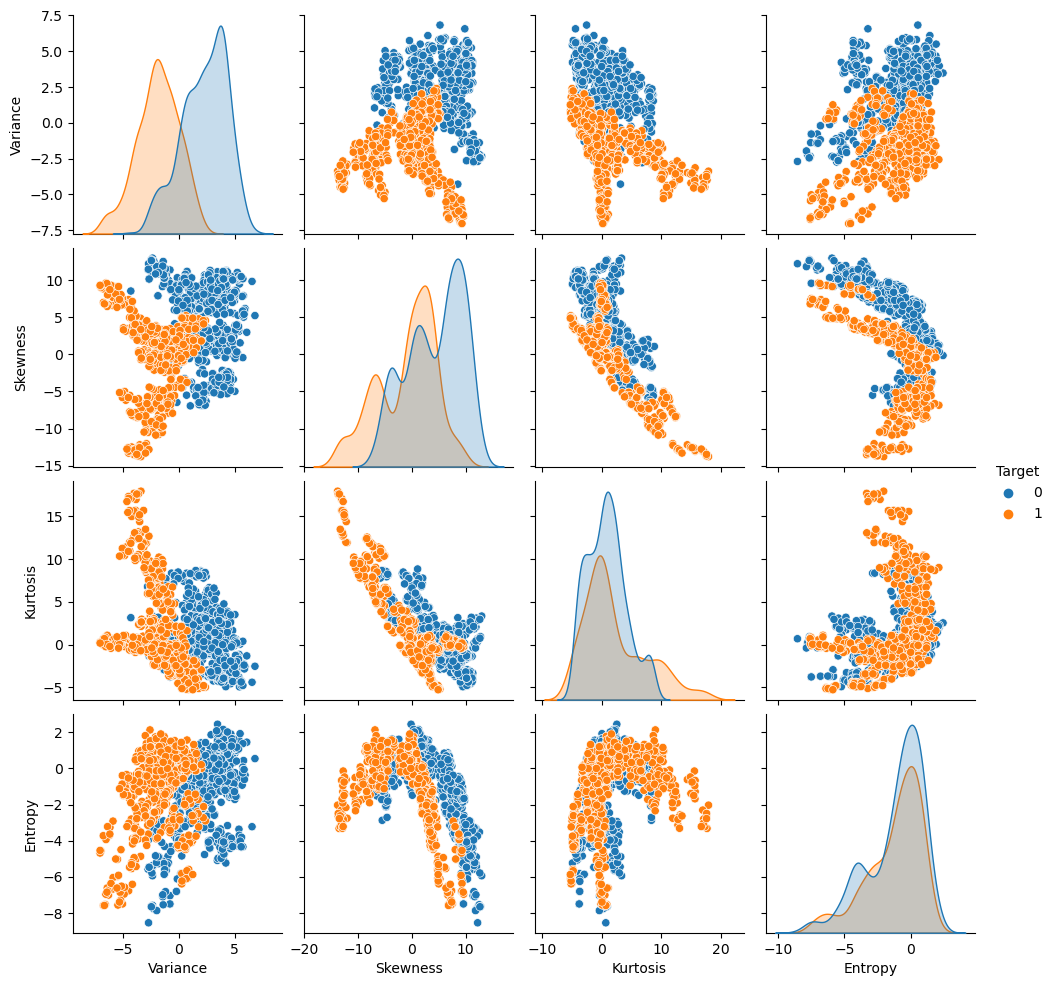

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,7))
sns.pairplot(dataset, hue='Target')
plt.show()

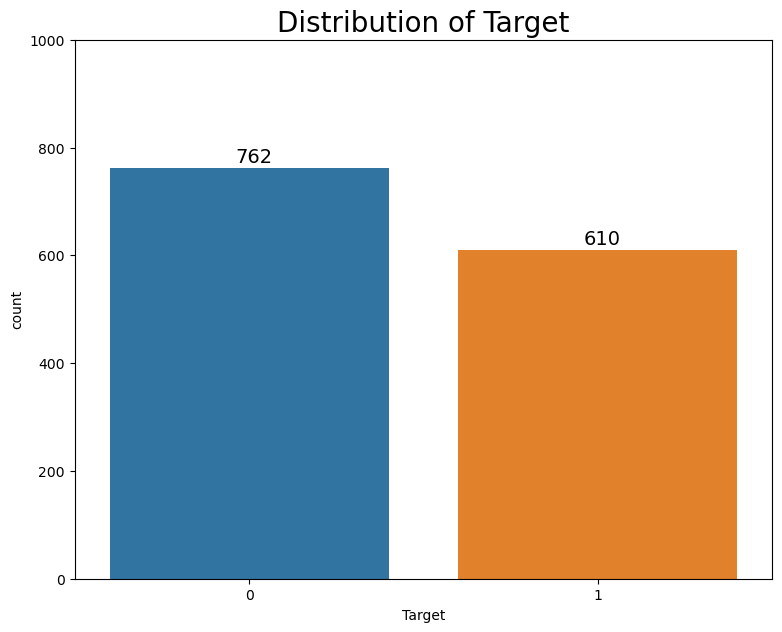

In [7]:
plt.figure(figsize=(9,7))
plt.title('Distribution of Target', size=20)
sns.countplot(x=dataset['Target'])
target_count = dataset.Target.value_counts()
plt.annotate(text=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(text=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,1000)
plt.show()

Splitting x and y values from the datset.

In [13]:
x = dataset.iloc[:,:-1].values
print("The shape of x :",x.shape)
print("The values of x:\n",x)

The shape of x : (1372, 4)
The values of x:
 [[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]


In [14]:
y = dataset.iloc[:,-1].values
print("The shape of y :",y.shape)
print("The values of y:\n",y)

The shape of y : (1372,)
The values of y:
 [0 0 0 ... 1 1 1]


Splitting train and test of x and y.

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

print("The shape of x_train :",x_train.shape)
print("The values of x_train:\n",x_train)
print("-" * 45)

print("The shape of x_test :",x_test.shape)
print("The values of x_test:\n",x_test)
print("-" * 45)

print("The shape of y_train :",y_train.shape)
print("The values of y_train:\n",y_train)
print("-" * 45)

print("The shape of y_test :",y_test.shape)
print("The values of y_test:\n",y_test)
print("-" * 45)

The shape of x_train : (1029, 4)
The values of x_train:
 [[-1.9983  -6.6072   4.8254  -0.41984]
 [ 1.9476  -4.7738   8.527   -1.8668 ]
 [-1.6637   3.2881  -2.2701  -2.2224 ]
 ...
 [-7.0364   9.2931   0.16594 -4.5396 ]
 [-3.4605   2.6901   0.16165 -1.0224 ]
 [-3.3582  -7.2404  11.4419  -0.57113]]
---------------------------------------------
The shape of x_test : (343, 4)
The values of x_test:
 [[ 1.5691    6.3465   -0.1828   -2.4099  ]
 [-0.27802   8.1881   -3.1338   -2.5276  ]
 [ 0.051979  7.0521   -2.0541   -3.1508  ]
 ...
 [-2.4941    3.5447   -1.3721   -2.8483  ]
 [ 4.0524    5.6802   -1.9693    0.026279]
 [-0.66008  -3.226     3.8058    1.1836  ]]
---------------------------------------------
The shape of y_train : (1029,)
The values of y_train:
 [1 0 1 ... 1 1 1]
---------------------------------------------
The shape of y_test : (343,)
The values of y_test:
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1
 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 

Rescale the values of feacture using Standard Scaler

In [21]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

print("The shape of x_train :",x_train.shape)
print("The values of x_train:\n",x_train)
print("-" * 45)

print("The shape of x_test :",x_test.shape)
print("The values of x_test:\n",x_test)
print("-" * 45)

The shape of x_train : (1029, 4)
The values of x_train:
 [[-0.84911721 -1.41853276  0.77033717  0.37307835]
 [ 0.54018083 -1.10901867  1.62390095 -0.31859526]
 [-0.73130908  0.25198908 -0.86583685 -0.48857863]
 ...
 [-2.62296411  1.26575154 -0.3041026  -1.59624305]
 [-1.36393806  0.15103488 -0.30509184  0.08504354]
 [-1.32791962 -1.52542941  2.29605705  0.30075894]]
---------------------------------------------
The shape of x_test : (343, 4)
The values of x_test:
 [[ 0.40691609  0.76830733 -0.38451967 -0.5782071 ]
 [-0.24342988  1.07920574 -1.06500019 -0.63446987]
 [-0.1272417   0.88742653 -0.81602872 -0.93237099]
 ...
 [-1.02368169  0.29530822 -0.65876416 -0.7877704 ]
 [ 1.28125245  0.65582275 -0.79647442  0.58633148]
 [-0.37794804 -0.8477195   0.53522435  1.1395523 ]]
---------------------------------------------


Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
LoR  = LogisticRegression()
model = LoR.fit(x_train,y_train)

In [25]:
#prediction of y
y_pred = model.predict(x_test)
print("The values of y_pred:\n",y_pred)

The values of y_pred:
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1
 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1
 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1
 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1
 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0
 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 1 1 1 0 1]


Finding the confusion metric and accuracy score

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
con_mat = pd.DataFrame(confusion_matrix(y_test,y_pred),columns = ['Predict Negative','Predict Positive'],
                       index = ['Actual Negative','Actual Positive'])
print("The Confusion Metrics for Logistic Regression:\n\n",con_mat)
acc = accuracy_score(y_test,y_pred)
print("-" * 45)

print("The Accuracy score  for Logistic Regression:\n",round((acc * 100),2),"%")

The Confusion Metrics for Logistic Regression:

                  Predict Negative  Predict Positive
Actual Negative               186                 5
Actual Positive                 2               150
---------------------------------------------
The Accuracy score  for Logistic Regression:
 97.96 %


Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model1 = dtc.fit(x_train, y_train)

In [29]:
#prediction of y
y_pred1 = model1.predict(x_test)
print("The values of y_pred1:\n",y_pred1)

The values of y_pred1:
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1
 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1
 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1
 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 1 1 1 0 1]


Finding the confusion metric and accuracy score

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score
con_mat1 = pd.DataFrame(confusion_matrix(y_test,y_pred1),columns = ['Predict Negative','Predict Positive'],
                       index = ['Actual Negative','Actual Positive'])
print("The Confusion Metrics for Logistic Regression:\n\n",con_mat1)
acc1 = accuracy_score(y_test,y_pred1)
print("-" * 45)

print("The Accuracy score  for Logistic Regression:\n",round((acc1 * 100),2),"%")

The Confusion Metrics for Logistic Regression:

                  Predict Negative  Predict Positive
Actual Negative               190                 1
Actual Positive                 5               147
---------------------------------------------
The Accuracy score  for Logistic Regression:
 98.25 %


XGBOOST

In [31]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
model2 = xgb.fit(x_train, y_train)

In [32]:
#prediction of y
y_pred2 = model2.predict(x_test)
print("The values of y_pred2:\n",y_pred2)

The values of y_pred2:
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1
 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1
 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1
 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0
 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 1 1 1 0 1]


Finding the confusion metric and accuracy score

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score
con_mat2 = pd.DataFrame(confusion_matrix(y_test,y_pred2),columns = ['Predict Negative','Predict Positive'],
                       index = ['Actual Negative','Actual Positive'])
print("The Confusion Metrics for Logistic Regression:\n\n",con_mat2)
acc2 = accuracy_score(y_test,y_pred2)
print("-" * 45)

print("The Accuracy score  for Logistic Regression:\n",round((acc2 * 100),2),"%")

The Confusion Metrics for Logistic Regression:

                  Predict Negative  Predict Positive
Actual Negative               191                 0
Actual Positive                 0               152
---------------------------------------------
The Accuracy score  for Logistic Regression:
 100.0 %


RESULT: 
         We create the  3 models using alogrithms,in that XGBOOST perform very well with the accuracy score of 100%.

Now using the below code,we detect the fake currency by giving input(feactures) from the users.
The model  is fitted with XGBOOST Algorithm.

In [35]:
var = float(input("Enter the Variance of the Currency:"))
ske = float(input("Enter the Skewness of the Currency:"))
kur = float(input("Enter the Kurtosis of the Currency:"))
ent = float(input("Enter the Entropy of the Currency:"))

new = [[var,ske,kur,ent]]
new = ss.transform(new)

result = model2.predict(new)
print(result)

if result==0:
    print("The Currency is Original.")
else:
    print("The Currency is Fake.")

Enter the Variance of the Currency:.85
Enter the Skewness of the Currency:-96
Enter the Kurtosis of the Currency:.32
Enter the Entropy of the Currency:69
[1]
The Currency is Fake.


            ------------------THANK YOU---------------------